# Online Retail Exploratory Data Analysis with Python

## Dataset

The dataset we will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

### STEP 1: Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'Online Retail.xlsx'
df = pd.read_excel(data)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### STEP 2: Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**We can see that the count of Description and CustomerID is not matching with the total entry count.**

**This indicates that there are empty values in the entries.**

In [5]:
df.duplicated().sum()

5268

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

**Since the count of null values in CustomerID is nearly one-fifth of the total count of entry, we can't simply drop those entries because it will highly influence the result of our analysis.** 

**Instead, we can drop the CustomerID column beacuse it is of no use in our analysis.**

In [8]:
df.drop(columns=['CustomerID'], inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.7+ MB


**Non-null count of all the columns is finally equal to the total entry count.**

In [12]:
df.describe()

,Quantity,UnitPrice
count,535187.000000,535187.000000
mean,9.671593,4.645242
std,219.059056,97.364810
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


**Now, we can see that min values of Quantity and UnitPrice are less than zero, which is of no meaning.**

**It may be to indicate refund values and other works done by the shop.**

**But we assume that they are of no use and drop it if the count of such values is not large enough.**

In [13]:
df.query('Quantity < 0').count()

InvoiceNo      9725
StockCode      9725
Description    9725
Quantity       9725
InvoiceDate    9725
UnitPrice      9725
Country        9725
dtype: int64

In [14]:
df.query('UnitPrice == 0').count()

InvoiceNo      1056
StockCode      1056
Description    1056
Quantity       1056
InvoiceDate    1056
UnitPrice      1056
Country        1056
dtype: int64

In [15]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [16]:
df.describe()

,Quantity,UnitPrice
count,524878.000000,524878.000000
mean,10.616600,3.922573
std,156.280031,36.093028
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


In [17]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

### STEP 3: Understanding the dataset 

In [18]:
df.nunique()

InvoiceNo      19960
StockCode       3922
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
Country           38
Month             12
DayOfWeek          6
Amount          4906
dtype: int64

**We can see that the StockCode count is not matching with Description count but it should be. So, we will drop those discrepant entries.**

**We also notice that nunique of DayOfWeek is 6 not 7 i.e, one day is strictly holiday in all the countries.**

In [19]:
df['StockCode'] = df['StockCode'].astype(str).str.upper()
df['Description'] = df['Description'].astype(str)

In [20]:
df['Description'] = df['Description'].str.replace(',', '')
df['Description'] = df['Description'].str.strip()

In [21]:
df.nunique()

InvoiceNo      19960
StockCode       3812
Description     4006
Quantity         375
InvoiceDate    18499
UnitPrice       1291
Country           38
Month             12
DayOfWeek          6
Amount          4906
dtype: int64

In [22]:
# Find StockCodes with multiple Descriptions
stockcode_description_counts = df.groupby('StockCode')['Description'].nunique()
multiple_descriptions = stockcode_description_counts[stockcode_description_counts > 1]

# Find Descriptions with multiple StockCodes
description_stockcode_counts = df.groupby('Description')['StockCode'].nunique()
multiple_stockcodes = description_stockcode_counts[description_stockcode_counts > 1]

# Combine the indices of the discrepant entries
discrepant_indices = df[df['StockCode'].isin(multiple_descriptions.index) | df['Description'].isin(multiple_stockcodes.index)].index

# Drop the discrepant entries
df.drop(discrepant_indices,inplace = True)

In [23]:
df.nunique()

InvoiceNo      19768
StockCode       3559
Description     3559
Quantity         357
InvoiceDate    18333
UnitPrice       1282
Country           38
Month             12
DayOfWeek          6
Amount          4717
dtype: int64

In [24]:
df.describe()

,Quantity,UnitPrice,Month,DayOfWeek,Amount
count,476974.00000,476974.000000,476974.000000,476974.000000,476974.000000
mean,10.53423,3.992359,7.520739,2.425338,19.930801
std,163.36224,37.827913,3.536383,1.845172,278.379461
min,1.00000,0.001000,1.000000,0.000000,0.001000
25%,1.00000,1.250000,5.000000,1.000000,3.750000
50%,3.00000,2.080000,8.000000,2.000000,9.900000
75%,10.00000,4.130000,11.000000,4.000000,17.400000
max,80995.00000,13541.330000,12.000000,6.000000,168469.600000


In [25]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
Month                   int64
DayOfWeek               int64
Amount                float64
dtype: object

**To understand the dataset better and to get cleaned dataset, it is wise to use visuals to find outliers and removing it from the originals.**

### STEP 4: Identifying Outliers and Removing it using Statistics

**HISTOGRAM**

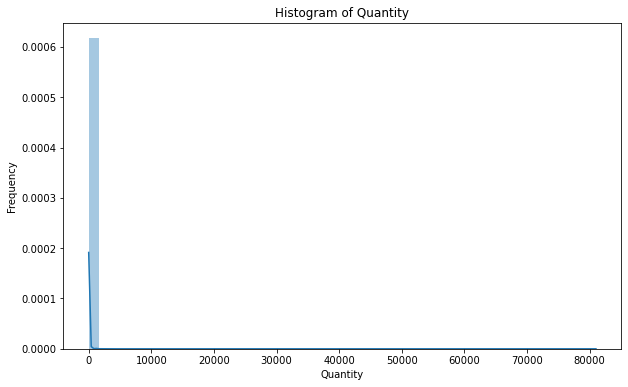

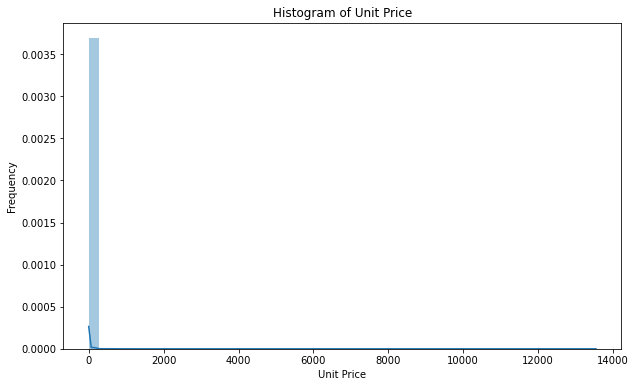

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Quantity'], bins=50, kde=True)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

Unfortunately, Histogram plot couldn't give any info about outliers.

**BOX PLOT**

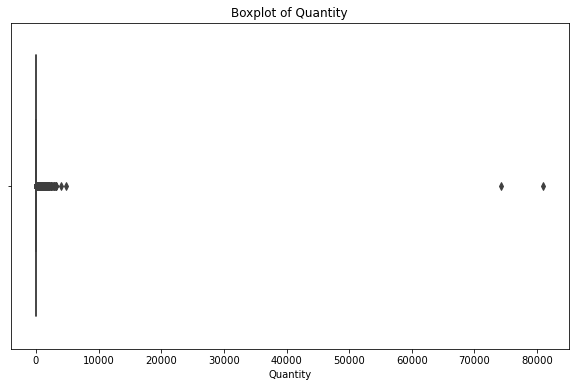

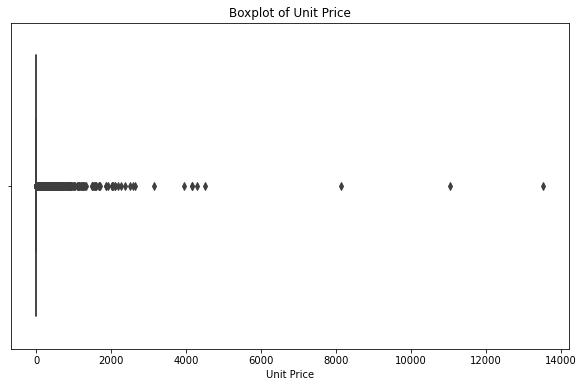

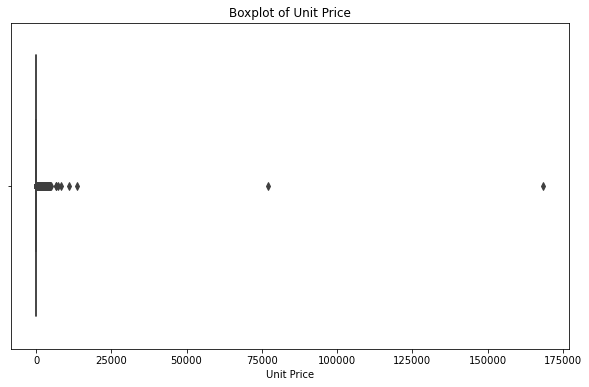

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=df)
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='UnitPrice', data=df)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

We can notice some outliers from the Box plot.

**SCATTER PLOT**

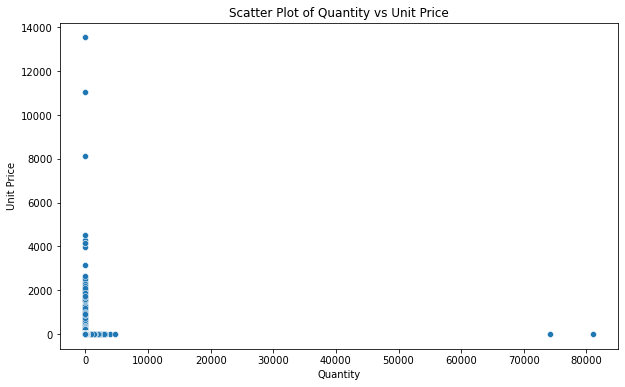

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

Scatter plot verifies the Box plot about outliers.

**We use Z-Score Method to filter out outliers statistically and remove it for getting better dataset.**

**Z-SCORE METHOD**

In [29]:
# Calculate Z-scores for Quantity
df['Quantity_zscore'] = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()

# Calculate Z-scores for UnitPrice
df['UnitPrice_zscore'] = (df['UnitPrice'] - df['UnitPrice'].mean()) / df['UnitPrice'].std()

# Calculate Z-scores for Amount
df['Amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Filter out outliers with Z-score > 3 or < -3
quantity_outliers = df[abs(df['Quantity_zscore']) > 3]
unitprice_outliers = df[abs(df['UnitPrice_zscore']) > 3]
amount_outliers = df[abs(df['Amount_zscore']) > 3]

print("Outliers in Quantity:")
print(quantity_outliers.count().unique())

print("Outliers in Unit Price:")
print(unitprice_outliers.count().unique())

print("Outliers in Amount:")
print(amount_outliers.count().unique())

Outliers in Quantity:
[378]
Outliers in Unit Price:
[765]
Outliers in Amount:
[468]


In [30]:
# Combine all outliers into a single DataFrame
all_outliers = pd.concat([quantity_outliers, unitprice_outliers, amount_outliers]).drop_duplicates()

# Remove outliers from the original DataFrame
df.drop(all_outliers.index, inplace = True)

**HISTOGRAM**

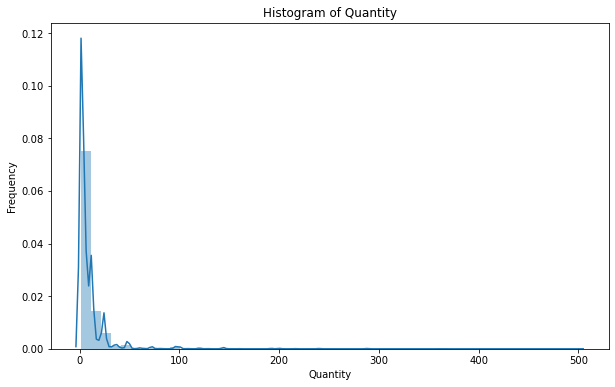

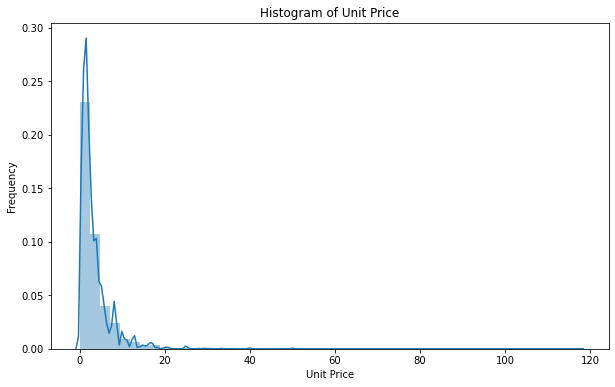

In [31]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Quantity'], bins=50, kde=True)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

**BOX PLOT**

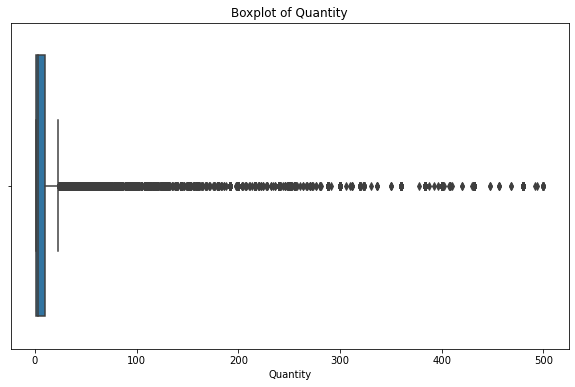

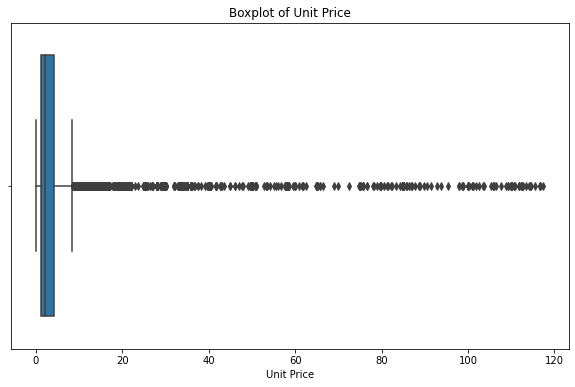

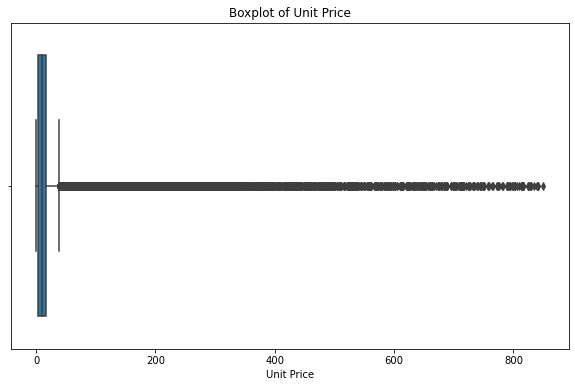

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=df)
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='UnitPrice', data=df)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

**SCATTER PLOT**

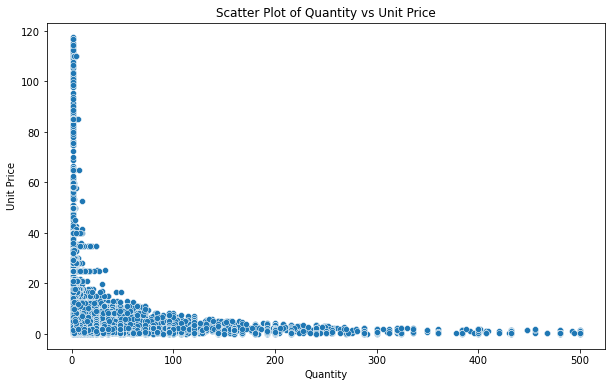

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

**Now, we can see that the plots are better and meaningful after removing outliers.**

In [34]:
df.drop(columns=['Quantity_zscore', 'UnitPrice_zscore', 'Amount_zscore'], inplace=True)

### STEP 5: Saving cleaned data to new excel file

In [36]:
#df.to_excel('Cleaned_Online_Retail.xlsx', index=False)

In [49]:
df_cleaned = pd.read_excel('Cleaned_Online_Retail.xlsx')

In [51]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,DayOfWeek,Amount
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,12,2,22.00
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,12,2,15.30
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,12,2,25.50
...,...,...,...,...,...,...,...,...,...,...
475571,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,France,12,4,23.40
475572,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,12,4,10.20
475573,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12,4,12.60
475574,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,12,4,16.60
